In [1]:
from cmath import exp, sqrt, cos, sin
import numpy as np
import matplotlib.pyplot as plt
from Un import Dif_eq

1. График зависимости нормы полной погрешности от длины шага. Демонстрирует сходимость 3-го порядка.
На примере решения уравнения 5у''+9y'+4y=0 y(0)=12 y'(0)=5 в точке 2 на интервале [0, 2] методом Симпсона (РК) и прямой с k=3.

7.334031390906585
7.286698877865645
7.282266182405398
7.2817908152022195
7.281735876897437
7.281729276393712


C:\Users\1\AppData\Local\Temp\ipykernel_16096\3770641358.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  Norm_.append(float(np.log10(abs(res_[-1][0])-Eq.y_true(x_end))))


Text(0, 0.5, 'log10(Норма полной погрешности)')

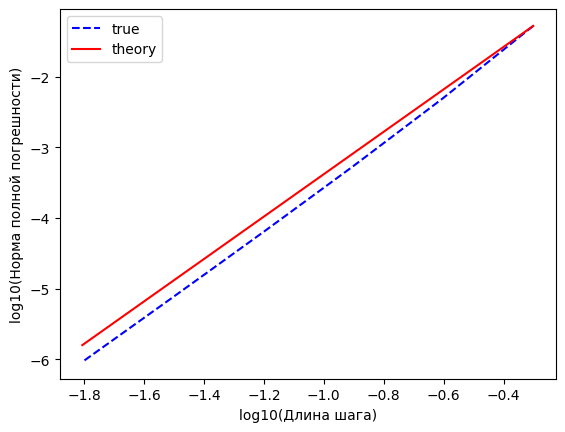

In [3]:
y0=[12,5]
m,p,k=5,9,4
x_start, x_end=0,2  
Eq =Dif_eq(m,p,k, y0, x_start, x_end)
H=[]
Norm_=[]
for k in range(1, 7):
    h = 1 / (2 ** k)
    H.append(np.log10(h))
    Eq.change(h=h)
    res_ = Eq.methodRK_fixstep()[1]
    print(res_[-1][0])
    Norm_.append(float(np.log10(abs(res_[-1][0])-Eq.y_true(x_end))))
y = (Norm_[0]) + 3*(np.array(H)-H[0])
fig, ax = plt.subplots()
ax.plot(H, Norm_, color='b', linestyle='--')
ax.plot(H, y, 'r')
ax.legend(['true', 'theory'])
plt.xlabel("log10(Длина шага)")
plt.ylabel("log10(Норма полной погрешности)")


2. График решения диффура 2-го порядка демонстрирует разницу между качеством апроксимации к аналитическому решению обычного метода РК и метода с плотной выдачей. Количество обращений к правой части в методах равно, но плотная выдача в 100 точках на рассматриваемом промежутке ближе к аналитическому решению. 
На примере решения уравнения 6у''+12y'+3y=0 y(0)=12 y'(0)=5 в точке 3 на интервале [0, 3] методом Симпсона (РК).

c:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'y')

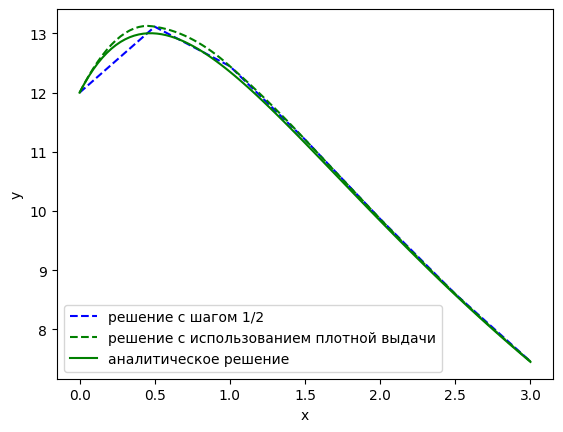

In [5]:
y0=[12,5]
m,p,k=6,12,3
x_start, x_end=0,3  
Eq =Dif_eq(m,p,k, y0, x_start, x_end)
Eq.change(h=1/2)
X = np.linspace(x_start,x_end,100)
x_mean, y_means, Y = Eq.methodRK_forsomex(X)

fig, ax = plt.subplots()
ax.plot(x_mean, [i[0] for i in y_means], color='b', linestyle='--')
ax.plot(X, Y, color='g', linestyle='--')
ax.plot(X, [Eq.y_true(i) for i in X], color='g')
ax.legend(['решение с шагом 1/2', 'решение с использованием плотной выдачи', 'аналитическое решение'])
plt.xlabel("x")
plt.ylabel("y")

3. График решения диффура 2-го порядка методом РК с автоматическим выбором оптимального шага и аналитичсекое решение.
На примере решения уравнения 6у''+12y'-3y=0 y(0)=12 y'(0)=5 в точке 3 на интервале [0, 3].

c:\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


Text(0, 0.5, 'y')

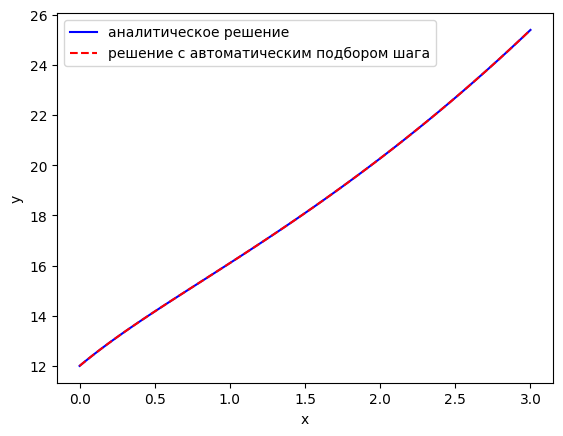

In [9]:
y0=[12,5]
m,p,k=6,12,-3
x_start, x_end=0,3  
Eq =Dif_eq(m,p,k, y0, x_start, x_end)
x, y, h = Eq.Auto_h_method(1/2)

fig, ax = plt.subplots()
ax.plot(x, [Eq.y_true(i) for i in x], color='b')
ax.plot(x, [i[0] for i in y], color='r', linestyle='--')
ax.legend(['аналитическое решение', 'решение с автоматическим подбором шага'])

plt.xlabel("x")
plt.ylabel("y")

4. График аналогичный графику 2. На примере решения уравнения 4у''+11y'+2y=0 y(0)=0 y'(0)=-8 на интервале [0, 5].

(-1.2746203431739365+0j) -1.2745770442512054


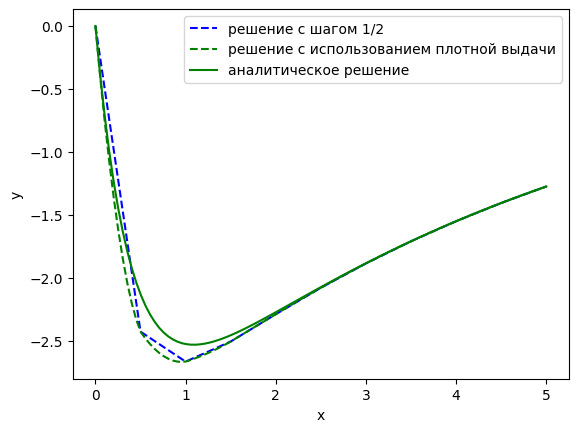

In [10]:
y0=[0,-8]
m,p,k=4,11,2
x_start, x_end=0,5 
Eq =Dif_eq(m,p,k, y0, x_start, x_end)
Eq.change(h=1/2)
X = np.linspace(x_start,x_end,100)
x_mean, y_means, Y = Eq.methodRK_forsomex(X)

fig, ax = plt.subplots()
ax.plot(x_mean, [i[0] for i in y_means], color='b', linestyle='--')
ax.plot(X, Y, color='g', linestyle='--')
ax.plot(X, [Eq.y_true(i) for i in X], color='g')
ax.legend(['решение с шагом 1/2', 'решение с использованием плотной выдачи', 'аналитическое решение'])
plt.xlabel("x")
plt.ylabel("y")
print(Eq.y_true(x_end), y_means[-1][0])

5. График аналогичный графику 2. На примере решения уравнения 6у''+6y'+9y=0 y(0)=3 y'(0)=8 на интервале [0, 3]. (D<0)

(-1.0542136778820252+0j) -0.9702890282000158


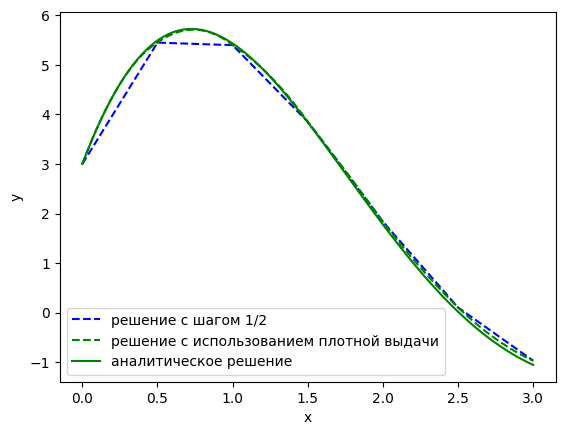

In [11]:
y0=[3,8]
m,p,k=6,6,9
x_start, x_end=0,3 
Eq =Dif_eq(m,p,k, y0, x_start, x_end)
Eq.change(h=1/2)
X = np.linspace(x_start,x_end,100)
x_mean, y_means, Y = Eq.methodRK_forsomex(X)

fig, ax = plt.subplots()
ax.plot(x_mean, [i[0] for i in y_means], color='b', linestyle='--')
ax.plot(X, Y, color='g', linestyle='--')
ax.plot(X, [Eq.y_true(i) for i in X], color='g')
ax.legend(['решение с шагом 1/2', 'решение с использованием плотной выдачи', 'аналитическое решение'])
plt.xlabel("x")
plt.ylabel("y")
print(Eq.y_true(x_end), y_means[-1][0])